In [26]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [27]:
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = 1*X - 1
Y = f* 0.1 + torch.randn(X.size())

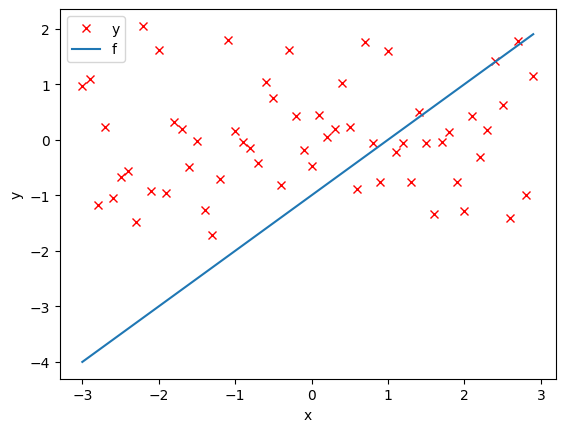

In [28]:
plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [29]:
def forward(x):
    return w*x + b

In [30]:
def criterion(yhat, y):
    return torch.mean((yhat-y)**2)

In [31]:
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

In [32]:
lr = 0.1
LOSS = []

In [33]:
def train_model(iter):
    for epoch in range(iter):
        Yhat = forward(X)
        loss = criterion(Yhat, Y)
        
        LOSS.append(loss.tolist())
        
        loss.backward()
        
        w.data = w.data - lr*w.grad.data
        b.data = b.data - lr*b.grad.data
        
        w.grad.data.zero_()
        b.grad.data.zero_()
    return loss

In [34]:
train_model(15)

tensor(1.1064, grad_fn=<MeanBackward0>)

In [35]:
#SGD

In [36]:
LOSS_SGD = []

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

def train_model_SGD(iter):
    for epoch in range(iter):
        Yhat = forward(X)
        loss = criterion(Yhat, Y)
        
        LOSS_SGD.append(loss.tolist())
        
        for x, y in zip(X, Y):
            yhat = forward(x)
            
            loss = criterion(yhat, y)
            
            loss.backward()
            
            
            w.data = w.data - lr*w.grad.data
            b.data = b.data - lr*b.grad.data
            
            w.grad.data.zero_()
            b.grad.data.zero_()

In [37]:
train_model_SGD(15)

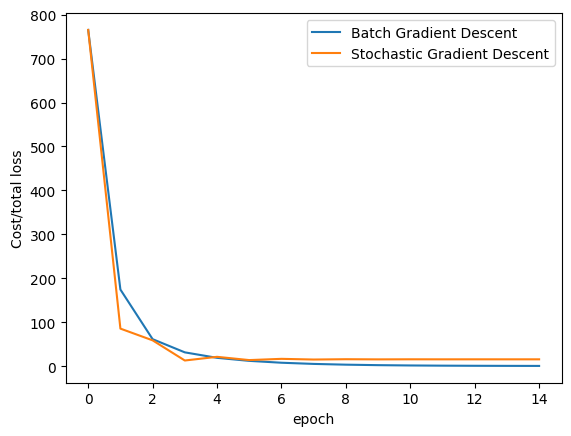

In [38]:
#LOSS = [ LOSS.detach().numpy() for loss in LOSS]
plt.plot(LOSS,label = "Batch Gradient Descent")
plt.plot(LOSS_SGD,label = "Stochastic Gradient Descent")
plt.xlabel('epoch')
plt.ylabel('Cost/total loss')
plt.legend()
plt.show()

In [39]:
#DATALOADER

In [40]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader 
import matplotlib.pyplot as plt

In [41]:
class Data(Dataset):
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.y = 1*self.x - 1
        self.len = self.x.shape[0]
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

In [42]:
dataset = Data()
len(dataset)

60

In [43]:
x, y = dataset[0:3]

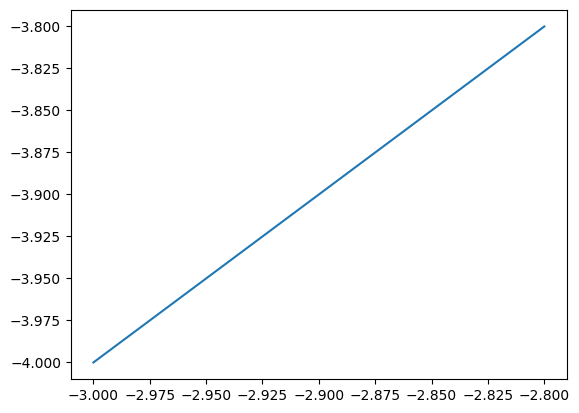

In [44]:
plt.plot(x, y)

In [45]:
trainloader = DataLoader(dataset = dataset, batch_size = 1)

In [48]:
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
Loss_Loader = []

def train_model_iterator(epochs):
    for epoch in range(epochs):
        Yhat = forward(X)
        
        loss = criterion(Yhat, Y)
        Loss_Loader.append(loss.tolist())
        
        for x, y in trainloader:
            yhat = forward(x)
            
            loss = criterion(yhat, y)
            
            loss.backward()
            
            
            w.data = w.data - lr*w.grad.data
            b.data = b.data - lr*b.grad.data
            
            w.grad.data.zero_()
            b.grad.data.zero_()
            
            
        
    

In [49]:
train_model_iterator(10)

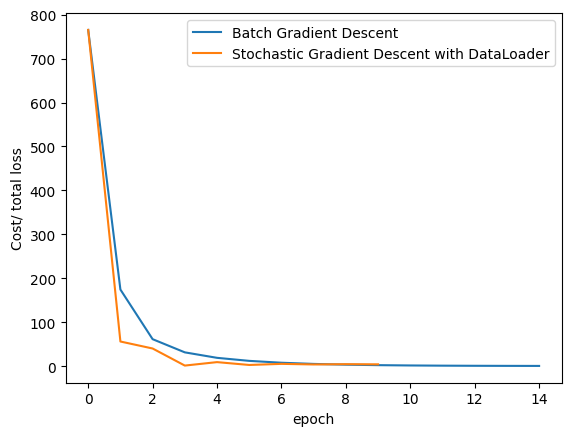

In [52]:

plt.plot(LOSS,label="Batch Gradient Descent")
plt.plot(Loss_Loader,label="Stochastic Gradient Descent with DataLoader")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()